# Project - Olympic Sports Analysis [Data Pre-processing]

- You can find the full project & the dataset at: https://www.kaggle.com/the-guardian/olympic-games
- In this project, we will consider these topics:
    - Data Cleaning & Manipulation
    - Data Grouping & Aggregation
    - Data Reshaping & Pivoting
    - Data Merging, Joining, & Concatenation

## Olympic Sports and Medals, 1896-2014
Which countries and athletes have won the most medals at the Olympic games?

### Importing libraries & data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set()

In [2]:
summer = pd.read_csv('summer.csv')

In [3]:
winter = pd.read_csv('winter.csv')

In [4]:
countries = pd.read_csv('dictionary.csv')

### Inspecting Datasets

In [5]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [6]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [7]:
winter.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


In [8]:
winter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5770 entries, 0 to 5769
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        5770 non-null   int64 
 1   City        5770 non-null   object
 2   Sport       5770 non-null   object
 3   Discipline  5770 non-null   object
 4   Athlete     5770 non-null   object
 5   Country     5770 non-null   object
 6   Gender      5770 non-null   object
 7   Event       5770 non-null   object
 8   Medal       5770 non-null   object
dtypes: int64(1), object(8)
memory usage: 405.8+ KB


In [9]:
countries.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


In [10]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         201 non-null    object 
 1   Code            201 non-null    object 
 2   Population      196 non-null    float64
 3   GDP per Capita  176 non-null    float64
dtypes: float64(2), object(2)
memory usage: 6.4+ KB


In [11]:
# Listing all the missing data in the 'Countries' DataFrame
countries[countries.isna().any(axis= 1)].reset_index(drop= True)

,Country,Code,Population,GDP per Capita
0,American Samoa*,ASA,55538.0,NaN
1,Andorra,AND,70473.0,NaN
2,Aruba*,ARU,103889.0,NaN
3,Bermuda*,BER,65235.0,NaN
4,British Virgin Islands,IVB,30117.0,NaN
5,Cayman Islands*,CAY,59967.0,NaN
6,Cook Islands,COK,NaN,NaN
7,Cuba,CUB,11389562.0,NaN
8,Eritrea,ERI,NaN,NaN
9,Guam,GUM,169885.0,NaN


---

### Proposed Questions

- ***Analysing all Summer editions data***
    - Can you find the __highest__ male / female __athletes__ of all time in the Summer editions?
    - Find the highest __athletes__ regarding to each __medal type__ in the Summer editions?

- ***Which are the most successful countries in both Summer and Winter editions?***
    - What are the __Top 10__ Countries by __total medals__?
    - __Split__ the total medals of Top 10 Countries into __Summer / Winter__. Are there typical Summer/Winter Games Countries? 
    - __Split__ the total medals of Top 10 Countries into __Gold, Silver, Bronze__. 


---

- ***Analysing all Summer editions data***
    - Can you find the __highest__ male / female __athletes__ of all time in the Summer editions?
    - Find the highest __athletes__ regarding to each __medal type__ in the Summer editions?

In [12]:
# Modify the full name of the athelets in witer & summer editions 
def modify_name(name):
    split_name = name.split(",")
    if len(split_name) == 2:
        return split_name[1].strip() + " " + split_name[0].strip()
    else:
        return name
summer["Athlete"] = summer["Athlete"].apply(modify_name).str.title()
winter["Athlete"] = winter["Athlete"].apply(modify_name).str.title()

In [13]:
summer[["Athlete"]].head()

,Athlete
0,Alfred Hajos
1,Otto Herschmann
2,Dimitrios Drivas
3,Ioannis Malokinis
4,Spiridon Chasapis


In [14]:
winter[["Athlete"]].head()

,Athlete
0,G. Berthet
1,C. Mandrillon
2,Maurice Mandrillon
3,André Vandelle
4,Adolf Aufdenblatten


##### Q. Can you find the highest male / female athletes of all time in the Summer editions

In [15]:
summer_medal_counts = summer.groupby(['Athlete', 'Gender'])["Medal"].size().sort_values(ascending= False).reset_index(name= "Medals_count")
summer_medal_counts.head()

,Athlete,Gender,Medals_count
0,Michael Phelps,Men,22
1,Larisa Latynina,Women,18
2,Nikolay Andrianov,Men,15
3,Boris Shakhlin,Men,13
4,Edoardo Mangiarotti,Men,13


In [16]:
# Adding the countries column to our DataFrame
merged_country_summer = summer.merge(countries, left_on="Country", right_on="Code", how="left")
merged_country_summer.head()

,Year,City,Sport,Discipline,Athlete,Country_x,Gender,Event,Medal,Country_y,Code,Population,GDP per Capita
0,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold,Hungary,HUN,9844686.0,12363.54346
1,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver,Austria,AUT,8611088.0,43774.98517
2,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Men,100M Freestyle For Sailors,Bronze,Greece,GRE,10823732.0,18002.23058
3,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100M Freestyle For Sailors,Gold,Greece,GRE,10823732.0,18002.23058
4,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Men,100M Freestyle For Sailors,Silver,Greece,GRE,10823732.0,18002.23058


In [17]:
merged_country_summer = merged_country_summer[["Year", "City", "Sport", "Discipline", "Athlete",
                                               "Code", "Gender", "Event", "Medal", "Country_y"]]
merged_country_summer = merged_country_summer.rename(columns={"Country_y": "Country"})
merged_country_summer.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold,Hungary
1,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver,Austria
2,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Men,100M Freestyle For Sailors,Silver,Greece


In [18]:
# The highest male of all summer editions 
summer_medal_counts.loc[0, "Athlete"]

'Michael Phelps'

In [19]:
## His total number of Medals
# The highest male of all summer editions 
summer_medal_counts.loc[0, "Medals_count"]

22

In [20]:
# The highest female of all summer editions 
summer_medal_counts.loc[1, "Athlete"]

'Larisa Latynina'

In [21]:
summer_medal_counts.loc[1, "Medals_count"]

18

### Q. Find the highest athletes regarding to each medal type in the Summer editions

In [22]:
summer_medal_type_counts = summer.groupby(['Athlete', 'Gender',"Medal"])["Medal"].size().sort_values(ascending= False).reset_index(name= "Medals_count")
medal_order = {"Gold":0, "Silver":1, "Bronze":2}
summer_medal_type_counts["Medal"] = summer_medal_type_counts["Medal"].map(medal_order)
summer_medal_type_counts_top = summer_medal_type_counts.sort_values(by=["Medal", "Medals_count"], ascending=[True, False]).groupby("Medal").head(1)
summer_medal_type_counts_top["Medal"] = summer_medal_type_counts_top["Medal"].replace({0:"Gold", 1:"Silver", 2:"Bronze"})
summer_medal_type_counts_top

,Athlete,Gender,Medal,Medals_count
0,Michael Phelps,Men,Gold,18
16,Mikhail Voronin,Men,Silver,6
19,Heikki Savolainen,Men,Bronze,6


In [23]:
# Let's discover what dow 'Michael phelps' have of medals
merged_country_summer[merged_country_summer["Athlete"] == "Michael Phelps"]

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
25225,2004,Athens,Aquatics,Swimming,Michael Phelps,USA,Men,100M Butterfly,Gold,United States
25253,2004,Athens,Aquatics,Swimming,Michael Phelps,USA,Men,200M Butterfly,Gold,United States
25258,2004,Athens,Aquatics,Swimming,Michael Phelps,USA,Men,200M Freestyle,Bronze,United States
25265,2004,Athens,Aquatics,Swimming,Michael Phelps,USA,Men,200M Individual Medley,Gold,United States
25277,2004,Athens,Aquatics,Swimming,Michael Phelps,USA,Men,400M Individual Medley,Gold,United States
25286,2004,Athens,Aquatics,Swimming,Michael Phelps,USA,Men,4X100M Freestyle Relay,Bronze,United States
25325,2004,Athens,Aquatics,Swimming,Michael Phelps,USA,Men,4X100M Medley Relay,Gold,United States
25361,2004,Athens,Aquatics,Swimming,Michael Phelps,USA,Men,4X200M Freestyle Relay,Gold,United States
27224,2008,Beijing,Aquatics,Swimming,Michael Phelps,USA,Men,100M Butterfly,Gold,United States
27252,2008,Beijing,Aquatics,Swimming,Michael Phelps,USA,Men,200M Butterfly,Gold,United States


In [24]:
men_athlete = summer[summer["Gender"] == "Men"]

In [25]:
summer_sport_type_counts = men_athlete.groupby(['Athlete', 'Medal'])["Sport"].size().sort_values(ascending= False).reset_index()
summer_sport_type_counts

,Athlete,Medal,Sport
0,Michael Phelps,Gold,18
1,Carl Lewis,Gold,9
2,Mark Spitz,Gold,9
3,Paavo Nurmi,Gold,9
4,Matthew Biondi,Gold,8
...,...,...,...
19734,Gösta Frändfors-Jönsson,Bronze,1
19735,Gösta Eriksson,Silver,1
19736,Gösta Brodin,Silver,1
19737,Gösta Bengtsson,Gold,1


In [26]:
summer_medal_counts = summer.groupby(["Athlete", "Medal"])["Sport"].size().reset_index(name="Medals_count")
summer_medal_counts = summer_medal_counts.sort_values(by=["Medals_count"], ascending=False)
top_per_medal = summer_medal_counts.groupby("Medal").head(1)
top_per_medal

,Athlete,Medal,Medals_count
17341,Michael Phelps,Gold,18
587,Aleksandr Dityatin,Silver,6
7654,Franziska Van Almsick,Bronze,6


### Q. Calculate the medals per each country for the best male and females athletes in all of the Summer editions and visualize the results

In [27]:
medals_country = merged_country_summer.pivot_table(index= "Country", columns= "Medal", values= "Athlete" , aggfunc= "count").fillna(0.0)
medals_country

Medal,Bronze,Gold,Silver
Country,,,
Afghanistan,2.0,0.0,0.0
Algeria,8.0,5.0,2.0
Argentina,91.0,69.0,99.0
Armenia,8.0,1.0,2.0
Australia,472.0,312.0,405.0
...,...,...,...
Venezuela,8.0,2.0,2.0
Vietnam,0.0,0.0,2.0
Virgin Islands*,0.0,0.0,1.0


In [28]:
top_medals_country = medals_country.sort_values(by=["Gold", "Silver", "Bronze"], ascending=[False, False, False])
top_medals_country.head(11)

Medal,Bronze,Gold,Silver
Country,,,
United States,1098.0,2235.0,1252.0
United Kingdom,553.0,546.0,621.0
Italy,404.0,476.0,416.0
Germany,475.0,452.0,378.0
Hungary,351.0,412.0,316.0
France,497.0,408.0,491.0
Sweden,328.0,349.0,367.0
Australia,472.0,312.0,405.0
China,221.0,290.0,296.0


---

#### Q. Which are the most successful countries in both Summer and Winter editions?
- What are the __Top 10__ Countries by __total medals__?
- __Split__ the total medals of Top 10 Countries into __Summer / Winter__. Are there typical Summer/Winter Games Countries? 
- __Split__ the total medals of Top 10 Countries into __Gold, Silver, Bronze__. 

In [29]:
merged_country_summer.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold,Hungary
1,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver,Austria
2,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Men,100M Freestyle For Sailors,Silver,Greece


In [30]:
winter.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,G. Berthet,FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,C. Mandrillon,FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,Maurice Mandrillon,FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,André Vandelle,FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,Adolf Aufdenblatten,SUI,Men,Military Patrol,Gold


In [31]:
countries.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


In [32]:
s_w_merge = pd.concat([merged_country_summer, winter], keys=["Summer", "Winter"], names=["Edition"]).reset_index(level="Edition")
s_w_merge

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,Summer,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold,Hungary
1,Summer,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver,Austria
2,Summer,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,Summer,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,Summer,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Men,100M Freestyle For Sailors,Silver,Greece
...,...,...,...,...,...,...,...,...,...,...,...
5765,Winter,2014,Sochi,Skiing,Snowboard,Jenny Jones,NaN,Women,Slopestyle,Bronze,GBR
5766,Winter,2014,Sochi,Skiing,Snowboard,Jamie Anderson,NaN,Women,Slopestyle,Gold,USA
5767,Winter,2014,Sochi,Skiing,Snowboard,Dominique Maltais,NaN,Women,Snowboard Cross,Silver,CAN
5768,Winter,2014,Sochi,Skiing,Snowboard,Eva Samkova,NaN,Women,Snowboard Cross,Gold,CZE


In [33]:
s_w_country_merge = pd.merge(s_w_merge, countries, how="left", left_on="Country", right_on="Code")
s_w_country_merge = s_w_country_merge.iloc[:, 0:13]
s_w_country_merge

,Edition,Year,City,Sport,Discipline,Athlete,Code_x,Gender,Event,Medal,Country_x,Country_y,Code_y
0,Summer,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold,Hungary,NaN,NaN
1,Summer,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver,Austria,NaN,NaN
2,Summer,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Men,100M Freestyle For Sailors,Bronze,Greece,NaN,NaN
3,Summer,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100M Freestyle For Sailors,Gold,Greece,NaN,NaN
4,Summer,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Men,100M Freestyle For Sailors,Silver,Greece,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36930,Winter,2014,Sochi,Skiing,Snowboard,Jenny Jones,NaN,Women,Slopestyle,Bronze,GBR,United Kingdom,GBR
36931,Winter,2014,Sochi,Skiing,Snowboard,Jamie Anderson,NaN,Women,Slopestyle,Gold,USA,United States,USA
36932,Winter,2014,Sochi,Skiing,Snowboard,Dominique Maltais,NaN,Women,Snowboard Cross,Silver,CAN,Canada,CAN
36933,Winter,2014,Sochi,Skiing,Snowboard,Eva Samkova,NaN,Women,Snowboard Cross,Gold,CZE,Czech Republic,CZE


In [34]:
s_w_country_merge = s_w_country_merge.drop(columns= ["Code_x","Code_y"])
s_w_country_merge

,Edition,Year,City,Sport,Discipline,Athlete,Gender,Event,Medal,Country_x,Country_y
0,Summer,1896,Athens,Aquatics,Swimming,Alfred Hajos,Men,100M Freestyle,Gold,Hungary,NaN
1,Summer,1896,Athens,Aquatics,Swimming,Otto Herschmann,Men,100M Freestyle,Silver,Austria,NaN
2,Summer,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,Men,100M Freestyle For Sailors,Bronze,Greece,NaN
3,Summer,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,Men,100M Freestyle For Sailors,Gold,Greece,NaN
4,Summer,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,Men,100M Freestyle For Sailors,Silver,Greece,NaN
...,...,...,...,...,...,...,...,...,...,...,...
36930,Winter,2014,Sochi,Skiing,Snowboard,Jenny Jones,Women,Slopestyle,Bronze,GBR,United Kingdom
36931,Winter,2014,Sochi,Skiing,Snowboard,Jamie Anderson,Women,Slopestyle,Gold,USA,United States
36932,Winter,2014,Sochi,Skiing,Snowboard,Dominique Maltais,Women,Snowboard Cross,Silver,CAN,Canada
36933,Winter,2014,Sochi,Skiing,Snowboard,Eva Samkova,Women,Snowboard Cross,Gold,CZE,Czech Republic


In [35]:
s_w_country_merge = s_w_country_merge.rename(columns= {"Country_x":"Code", "Country_y":"Country"})
s_w_country_merge

,Edition,Year,City,Sport,Discipline,Athlete,Gender,Event,Medal,Code,Country
0,Summer,1896,Athens,Aquatics,Swimming,Alfred Hajos,Men,100M Freestyle,Gold,Hungary,NaN
1,Summer,1896,Athens,Aquatics,Swimming,Otto Herschmann,Men,100M Freestyle,Silver,Austria,NaN
2,Summer,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,Men,100M Freestyle For Sailors,Bronze,Greece,NaN
3,Summer,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,Men,100M Freestyle For Sailors,Gold,Greece,NaN
4,Summer,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,Men,100M Freestyle For Sailors,Silver,Greece,NaN
...,...,...,...,...,...,...,...,...,...,...,...
36930,Winter,2014,Sochi,Skiing,Snowboard,Jenny Jones,Women,Slopestyle,Bronze,GBR,United Kingdom
36931,Winter,2014,Sochi,Skiing,Snowboard,Jamie Anderson,Women,Slopestyle,Gold,USA,United States
36932,Winter,2014,Sochi,Skiing,Snowboard,Dominique Maltais,Women,Snowboard Cross,Silver,CAN,Canada
36933,Winter,2014,Sochi,Skiing,Snowboard,Eva Samkova,Women,Snowboard Cross,Gold,CZE,Czech Republic


#### Remove Rows from Olympics where the Country code is unknown 

In [ ]:
s_w_country_merge_code_nan = s_w_country_merge[s_w_country_merge["Code"].isna()]
s_w_country_merge_code_nan

,Edition,Year,City,Sport,Discipline,Athlete,Gender,Event,Medal,Code,Country
132,Summer,1896,Athens,Tennis,Tennis,Edwin Flack,Men,Doubles,Bronze,NaN,NaN
133,Summer,1896,Athens,Tennis,Tennis,George Stuart Robertson,Men,Doubles,Bronze,NaN,NaN
134,Summer,1896,Athens,Tennis,Tennis,John Boland,Men,Doubles,Gold,NaN,NaN
135,Summer,1896,Athens,Tennis,Tennis,Friedrich Traun,Men,Doubles,Gold,NaN,NaN
136,Summer,1896,Athens,Tennis,Tennis,Dionysios Kasdaglis,Men,Doubles,Silver,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
31072,Summer,2012,London,Weightlifting,Weightlifting,Pending,Women,63KG,Gold,NaN,NaN
31077,Summer,2012,London,Weightlifting,Weightlifting,Razvan Constantin Martin,Men,69KG,Bronze,NaN,NaN
31079,Summer,2012,London,Weightlifting,Weightlifting,Roxana Daniela Cocos,Women,69KG,Silver,NaN,NaN
31091,Summer,2012,London,Weightlifting,Weightlifting,Pending,Men,94KG,Silver,NaN,NaN


In [37]:
s_w_country_merge = s_w_country_merge[s_w_country_merge["Code"].notna()]
s_w_country_merge

,Edition,Year,City,Sport,Discipline,Athlete,Gender,Event,Medal,Code,Country
0,Summer,1896,Athens,Aquatics,Swimming,Alfred Hajos,Men,100M Freestyle,Gold,Hungary,NaN
1,Summer,1896,Athens,Aquatics,Swimming,Otto Herschmann,Men,100M Freestyle,Silver,Austria,NaN
2,Summer,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,Men,100M Freestyle For Sailors,Bronze,Greece,NaN
3,Summer,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,Men,100M Freestyle For Sailors,Gold,Greece,NaN
4,Summer,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,Men,100M Freestyle For Sailors,Silver,Greece,NaN
...,...,...,...,...,...,...,...,...,...,...,...
36930,Winter,2014,Sochi,Skiing,Snowboard,Jenny Jones,Women,Slopestyle,Bronze,GBR,United Kingdom
36931,Winter,2014,Sochi,Skiing,Snowboard,Jamie Anderson,Women,Slopestyle,Gold,USA,United States
36932,Winter,2014,Sochi,Skiing,Snowboard,Dominique Maltais,Women,Snowboard Cross,Silver,CAN,Canada
36933,Winter,2014,Sochi,Skiing,Snowboard,Eva Samkova,Women,Snowboard Cross,Gold,CZE,Czech Republic


In [38]:
s_w_country_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31512 entries, 0 to 36934
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Edition     31512 non-null  object
 1   Year        31512 non-null  int64 
 2   City        31512 non-null  object
 3   Sport       31512 non-null  object
 4   Discipline  31512 non-null  object
 5   Athlete     31512 non-null  object
 6   Gender      31512 non-null  object
 7   Event       31512 non-null  object
 8   Medal       31512 non-null  object
 9   Code        31512 non-null  object
 10  Country     4826 non-null   object
dtypes: int64(1), object(10)
memory usage: 2.9+ MB


In [39]:
s_w_country_merge

,Edition,Year,City,Sport,Discipline,Athlete,Gender,Event,Medal,Code,Country
0,Summer,1896,Athens,Aquatics,Swimming,Alfred Hajos,Men,100M Freestyle,Gold,Hungary,NaN
1,Summer,1896,Athens,Aquatics,Swimming,Otto Herschmann,Men,100M Freestyle,Silver,Austria,NaN
2,Summer,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,Men,100M Freestyle For Sailors,Bronze,Greece,NaN
3,Summer,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,Men,100M Freestyle For Sailors,Gold,Greece,NaN
4,Summer,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,Men,100M Freestyle For Sailors,Silver,Greece,NaN
...,...,...,...,...,...,...,...,...,...,...,...
36930,Winter,2014,Sochi,Skiing,Snowboard,Jenny Jones,Women,Slopestyle,Bronze,GBR,United Kingdom
36931,Winter,2014,Sochi,Skiing,Snowboard,Jamie Anderson,Women,Slopestyle,Gold,USA,United States
36932,Winter,2014,Sochi,Skiing,Snowboard,Dominique Maltais,Women,Snowboard Cross,Silver,CAN,Canada
36933,Winter,2014,Sochi,Skiing,Snowboard,Eva Samkova,Women,Snowboard Cross,Gold,CZE,Czech Republic


#### Convert the column Medal into an ordered Categorical column ("Bronze" < "Silver" < "Gold")

In [40]:
s_w_country_merge["Medal"] = pd.Categorical(s_w_country_merge["Medal"], 
                                            categories= ["Bronze","Silver","Gold"],ordered= True)
s_w_country_merge = s_w_country_merge.sort_values("Medal")

C:\Users\LOQ\AppData\Local\Temp\ipykernel_19116\1115952051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_w_country_merge["Medal"] = pd.Categorical(s_w_country_merge["Medal"],


In [41]:
s_w_country_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31512 entries, 36934 to 0
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Edition     31512 non-null  object  
 1   Year        31512 non-null  int64   
 2   City        31512 non-null  object  
 3   Sport       31512 non-null  object  
 4   Discipline  31512 non-null  object  
 5   Athlete     31512 non-null  object  
 6   Gender      31512 non-null  object  
 7   Event       31512 non-null  object  
 8   Medal       31512 non-null  category
 9   Code        31512 non-null  object  
 10  Country     4826 non-null   object  
dtypes: category(1), int64(1), object(9)
memory usage: 2.7+ MB


In [42]:
s_w_country_merge["Medal"]

36934    Bronze
27010    Bronze
27009    Bronze
27008    Bronze
27007    Bronze
          ...  
27505      Gold
27506      Gold
27507      Gold
9682       Gold
0          Gold
Name: Medal, Length: 31512, dtype: category
Categories (3, object): ['Bronze' < 'Silver' < 'Gold']

---

#### 3] Data Analysis & Visualization (EDA)

#### Q. What are the Top 10 Countries by total medals?

In [43]:
s_w_country_merge

,Edition,Year,City,Sport,Discipline,Athlete,Gender,Event,Medal,Code,Country
36934,Winter,2014,Sochi,Skiing,Snowboard,Chloe Trespeuch,Women,Snowboard Cross,Bronze,FRA,France
27010,Summer,2004,Athens,Volleyball,Volleyball,Taras Khtey,Men,Volleyball,Bronze,Russia,NaN
27009,Summer,2004,Athens,Volleyball,Volleyball,Vadim Khamuttskikh,Men,Volleyball,Bronze,Russia,NaN
27008,Summer,2004,Athens,Volleyball,Volleyball,Alexei Kazakov,Men,Volleyball,Bronze,Russia,NaN
27007,Summer,2004,Athens,Volleyball,Volleyball,Andrey Egorchev,Men,Volleyball,Bronze,Russia,NaN
...,...,...,...,...,...,...,...,...,...,...,...
27505,Summer,2008,Beijing,Aquatics,Water polo,Gillian Van Den Berg,Women,Water Polo,Gold,Netherlands,NaN
27506,Summer,2008,Beijing,Aquatics,Water polo,Marieke Van Den Ham,Women,Water Polo,Gold,Netherlands,NaN
27507,Summer,2008,Beijing,Aquatics,Water polo,Ilse Van Der Meijden,Women,Water Polo,Gold,Netherlands,NaN
9682,Summer,1956,Melbourne / Stockholm,Sailing,Sailing,Bengt Palmquist,Men,Dragon,Gold,Sweden,NaN


In [44]:
top_countries_medal = s_w_country_merge.groupby("Country")["Medal"].count().sort_values(ascending= False)
top_countries_medal

Country
United States     653
Canada            625
Norway            457
Finland           434
Sweden            433
Germany           360
Switzerland       285
Austria           280
Russia            263
Italy             192
France            152
Netherlands       122
Korea, South       87
China              82
United Kingdom     79
Czech Republic     75
Japan              63
Poland             27
Slovenia           18
Latvia             15
Belarus            15
Australia          15
Belgium            13
Hungary            12
Croatia            11
Ukraine            11
Liechtenstein       9
Kazakhstan          7
Estonia             7
Bulgaria            6
Denmark             5
Slovakia            5
Korea, North        2
Spain               2
Luxembourg          2
New Zealand         1
Uzbekistan          1
Name: Medal, dtype: int64

In [45]:
top_10_countries = top_countries_medal.head(10)
top_10_countries

Country
United States    653
Canada           625
Norway           457
Finland          434
Sweden           433
Germany          360
Switzerland      285
Austria          280
Russia           263
Italy            192
Name: Medal, dtype: int64

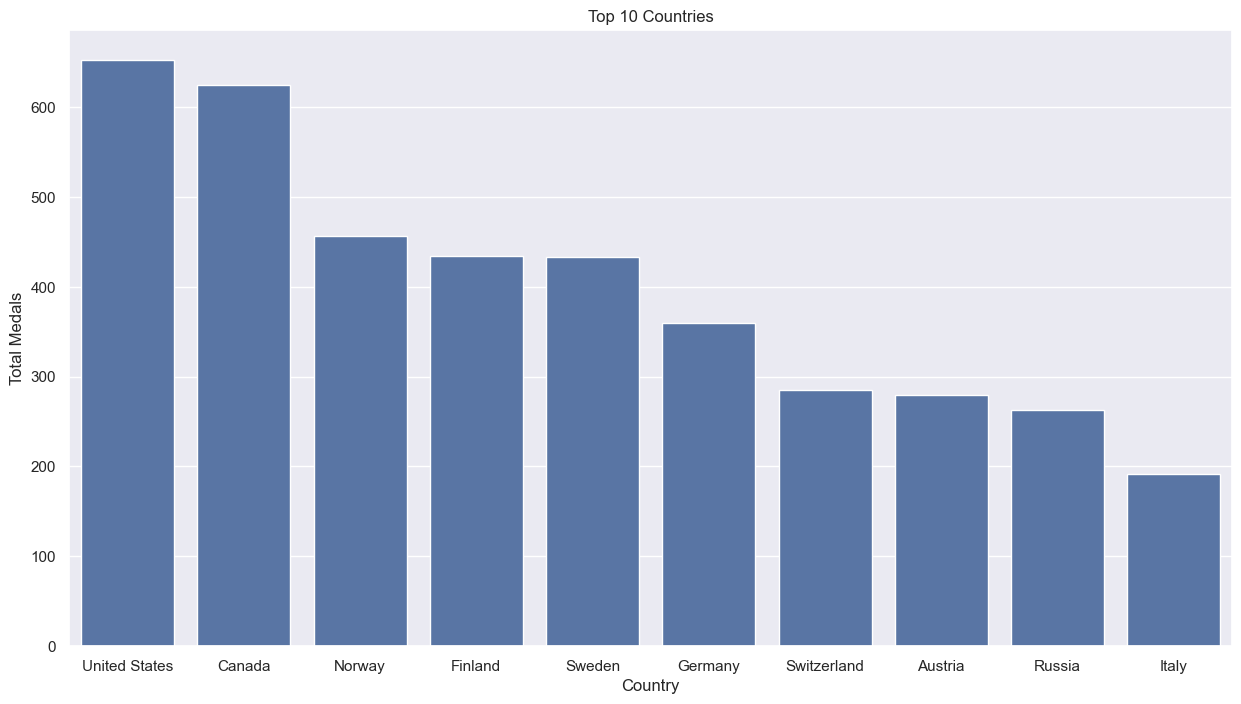

In [46]:
plt.figure(figsize= (15,8))
sns.barplot(data= top_10_countries)

plt.title("Top 10 Countries")
plt.xlabel("Country")
plt.ylabel("Total Medals")
plt.show()

In [47]:
s_w_country_merge.reset_index(drop= True)

,Edition,Year,City,Sport,Discipline,Athlete,Gender,Event,Medal,Code,Country
0,Winter,2014,Sochi,Skiing,Snowboard,Chloe Trespeuch,Women,Snowboard Cross,Bronze,FRA,France
1,Summer,2004,Athens,Volleyball,Volleyball,Taras Khtey,Men,Volleyball,Bronze,Russia,NaN
2,Summer,2004,Athens,Volleyball,Volleyball,Vadim Khamuttskikh,Men,Volleyball,Bronze,Russia,NaN
3,Summer,2004,Athens,Volleyball,Volleyball,Alexei Kazakov,Men,Volleyball,Bronze,Russia,NaN
4,Summer,2004,Athens,Volleyball,Volleyball,Andrey Egorchev,Men,Volleyball,Bronze,Russia,NaN
...,...,...,...,...,...,...,...,...,...,...,...
31507,Summer,2008,Beijing,Aquatics,Water polo,Gillian Van Den Berg,Women,Water Polo,Gold,Netherlands,NaN
31508,Summer,2008,Beijing,Aquatics,Water polo,Marieke Van Den Ham,Women,Water Polo,Gold,Netherlands,NaN
31509,Summer,2008,Beijing,Aquatics,Water polo,Ilse Van Der Meijden,Women,Water Polo,Gold,Netherlands,NaN
31510,Summer,1956,Melbourne / Stockholm,Sailing,Sailing,Bengt Palmquist,Men,Dragon,Gold,Sweden,NaN


#### Q. Split the total medals of Top 10 Countries into Summer / Winter. Are there typical Summer/Winter Games Countries?

In [48]:
top10_countries = (
    s_w_country_merge.groupby("Country")["Medal"].count()
    .sort_values(ascending=False)
    .head(10)
    .index
)

In [49]:
top10_df = s_w_country_merge[s_w_country_merge["Country"].isin(top10_countries)]
top10_df

,Edition,Year,City,Sport,Discipline,Athlete,Gender,Event,Medal,Code,Country
33457,Winter,1988,Calgary,Ice Hockey,Ice Hockey,Thomas Rundqvist,Men,Ice Hockey,Bronze,SWE,Sweden
33713,Winter,1992,Albertville,Bobsleigh,Bobsleigh,Christoph Langen,Men,Two-Man,Bronze,GER,Germany
33712,Winter,1992,Albertville,Bobsleigh,Bobsleigh,Günther Eger,Men,Two-Man,Bronze,GER,Germany
33703,Winter,1992,Albertville,Bobsleigh,Bobsleigh,Gustav Weder,Men,Four-Man,Bronze,SUI,Switzerland
33670,Winter,1992,Albertville,Biathlon,Biathlon,Myriam Bedard,Women,15KM,Bronze,CAN,Canada
...,...,...,...,...,...,...,...,...,...,...,...
34042,Winter,1994,Lillehammer,Bobsleigh,Bobsleigh,Donat Acklin,Men,Two-Man,Gold,SUI,Switzerland
34043,Winter,1994,Lillehammer,Bobsleigh,Bobsleigh,Gustav Weder,Men,Two-Man,Gold,SUI,Switzerland
34069,Winter,1994,Lillehammer,Ice Hockey,Ice Hockey,Hakan Algotsson,Men,Ice Hockey,Gold,SWE,Sweden
34070,Winter,1994,Lillehammer,Ice Hockey,Ice Hockey,Jonas Bergkvist,Men,Ice Hockey,Gold,SWE,Sweden


In [50]:
top_10_countries = top_10_countries.reset_index()
top_10_countries

,Country,Medal
0,United States,653
1,Canada,625
2,Norway,457
3,Finland,434
4,Sweden,433
5,Germany,360
6,Switzerland,285
7,Austria,280
8,Russia,263
9,Italy,192


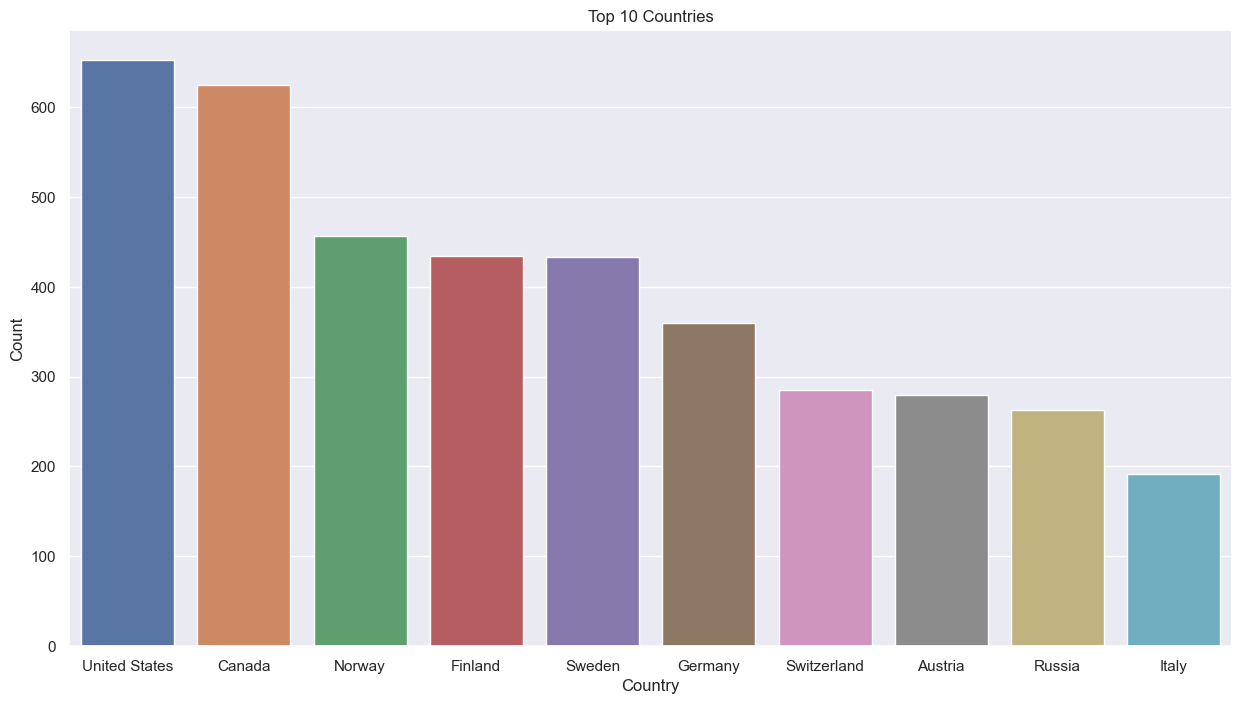

In [51]:
plt.figure(figsize=(15,8))
sns.barplot(data= top_10_countries, x= "Country", y= "Medal", hue= "Country")

plt.title("Top 10 Countries")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

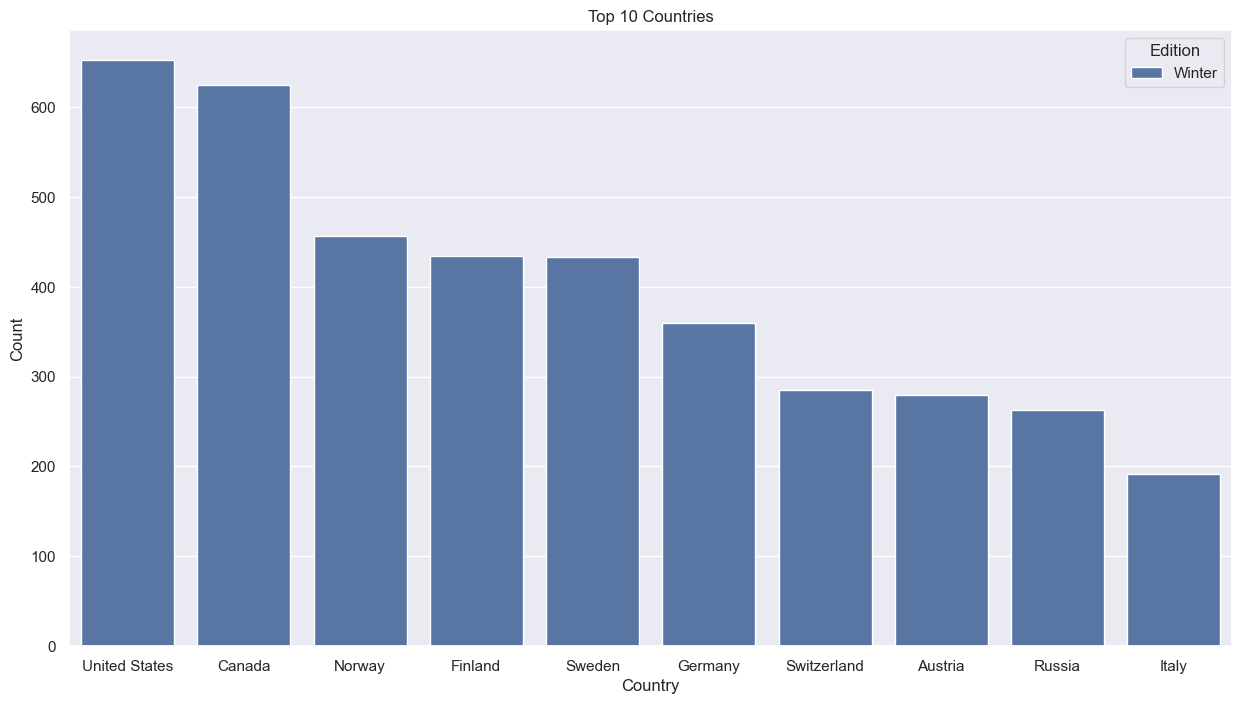

In [52]:
top10_count = top10_df.groupby(["Country", "Edition"])["Medal"].count().sort_values(ascending= False)
top10_count = top10_count.reset_index()

plt.figure(figsize=(15,8))
sns.barplot(data= top10_count, x= "Country", y= "Medal", hue= "Edition", legend= True)

plt.title("Top 10 Countries")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

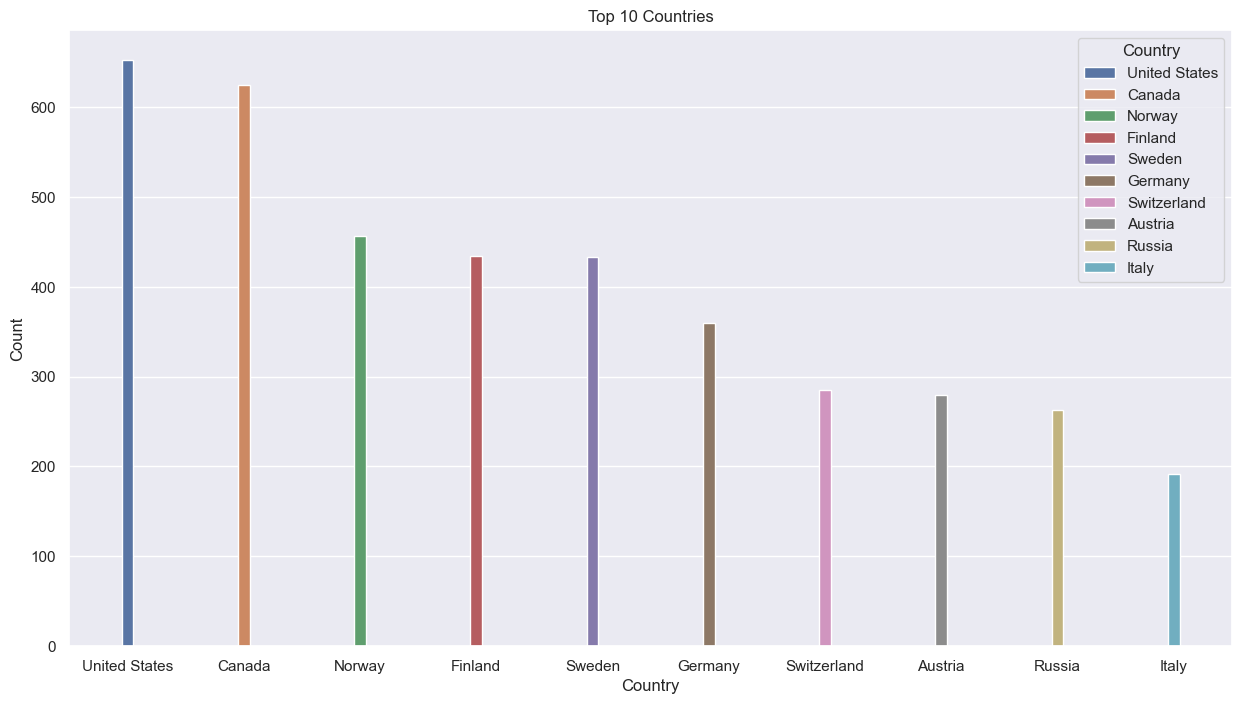

In [53]:
plt.figure(figsize=(15,8))
sns.barplot(data= top_10_countries, x= "Country", y= "Medal", hue= "Country", legend= True, width= 0.1)

plt.title("Top 10 Countries")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

#### Q. Split the total medals of Top 10 Countries into Gold, Silver, Bronze

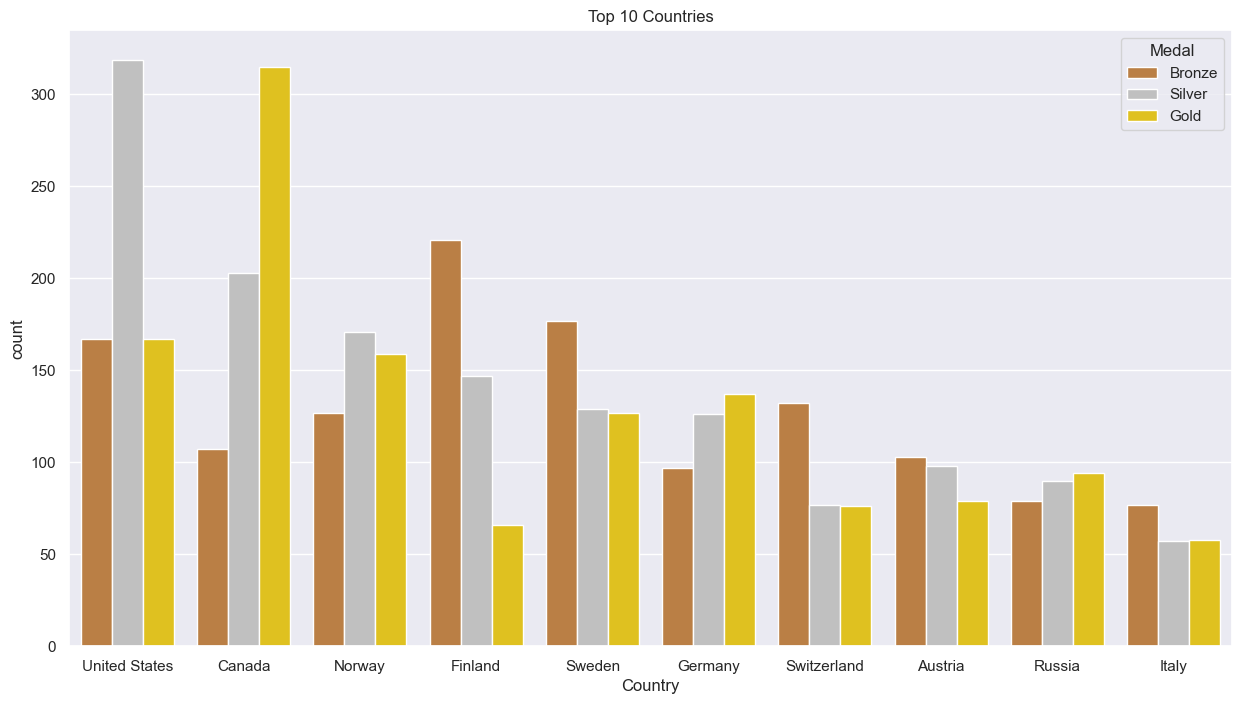

In [54]:
country_order = top10_df.groupby("Country")["Medal"].count().sort_values(ascending=False).index

medal_palette = {'Gold': '#FFD700','Silver': '#C0C0C0','Bronze': '#CD7F32'}
sns.set_palette(sns.color_palette([medal_palette[m] for m in ['Gold', 'Silver', 'Bronze']]))

plt.figure(figsize=(15,8))
sns.countplot(data=top10_df, x="Country", hue="Medal", order=country_order, palette= medal_palette)

plt.title("Top 10 Countries")
plt.xlabel("Country")
plt.show()

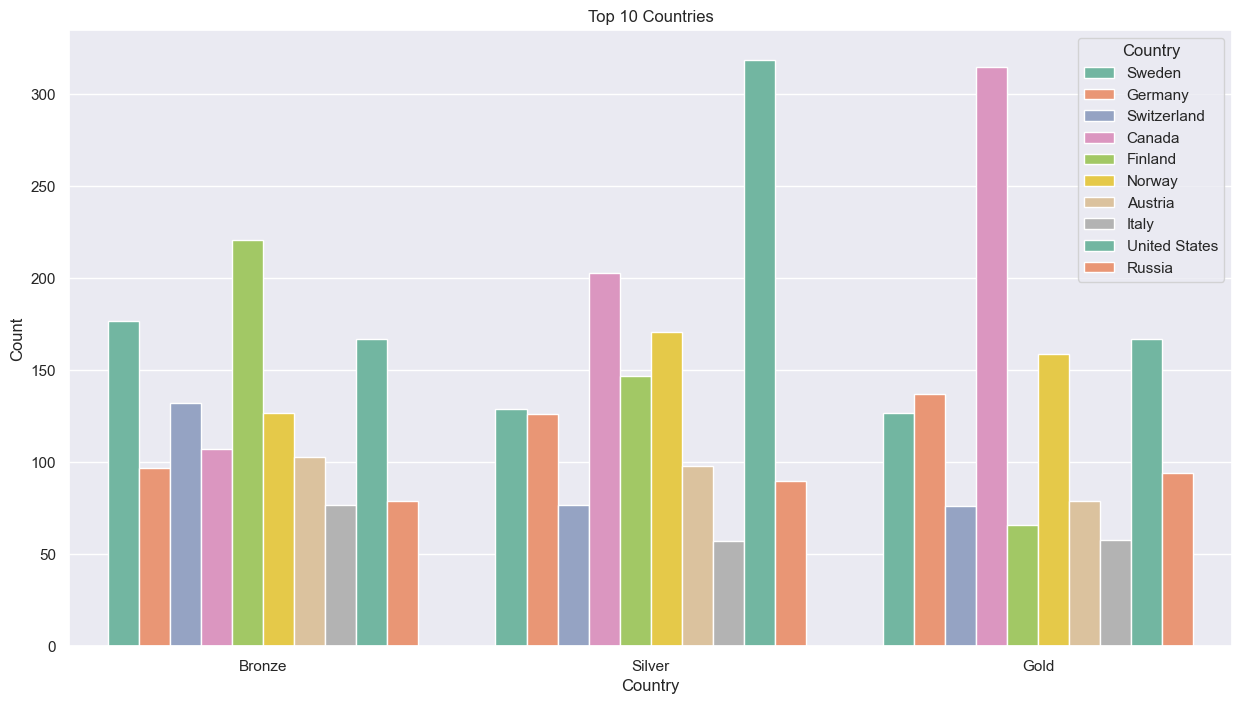

In [55]:
country_order = top10_df.groupby("Country")["Medal"].count().sort_values(ascending=False).index

plt.figure(figsize=(15,8))
sns.countplot(data= top10_df, x= "Medal", hue= "Country", legend= True, palette= "Set2")

plt.title("Top 10 Countries")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

---

# THANK YOU!